Comportamiento de los puertos
=============================

Muchos datos que se analizan son mediciones con respecto al tiempo, lo cual en general son consideradas como  [series de tiempo](https://es.wikipedia.org/wiki/Serie_temporal). Su analisis permite hacer algunas predicciones a corto plazo o por lo menos detectar alguna tendencia, estacionalidad o ciclos. 

Objetivo
--------

La finalidad es explorar el comportamiento del porcentaje de ocupación de muelles y boyas y marin seca con respecto al tiempo, primero se revisa aspectos de los datos de como tipo de datos, cantidad, etc. Luego se hace una pequeña revisión para elegir los puertos que muestran mayor ocupación y después se hace una comparación entre los puertos y por cada puerto respecto al tipo de ocupación.

Datos
-----
Los datos analizados corresponden a los proporcionados por SECTUR. En la siguiente liga se pueden descargar o ver más detalles:
  * http://catalogo.datos.gob.mx/dataset/estadistica-mensual-marinas


Procesamiento
-------------

Primero se cargan los módulos requeridos, si se usan los gráficos tipo ggplot2 se agrega al código las líneas siguientes

~~~python
import matplotlib 
matplotlib.style.use('ggplot')
~~~

En los ejemplos usos los gráficos básicos de Pandas y al final muestro un par hechos en **seaborn**.

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
plt.rcParams['figure.figsize']=(20,5)

In [2]:
#No usamos ninguan columna como índice para los datos
Puertos=pd.read_csv('~/Documentos/Tutorial-Python/Datos/Informacion_Estadistica_Mensual_de_las_Marinas_FOP_180216.csv')

Se revisan las cantidades de filas y columanas, se visulizan los primeros y los últimos registros.

In [3]:
#Se obtiene que que la tabla cuanta con 288 filas y 4 columnas.
Puertos.shape

(288, 4)

In [ ]:
#Se visualizan las primeras 5 filas
Puertos.head()

In [14]:
#Se podría no hacer esto, pero solo por explorar los últimos registros los visualizo
Puertos.tail()

,Fecha,Marina Fonatur,Porcentaje de ocupacion muelles y boyas,Porcentaje de ocupacion marina seca
283,2015-08,Puerto Penasco,27,0.0
284,2015-09,Puerto Penasco,28,0.0
285,2015-10,Puerto Penasco,27,0.0
286,2015-11,Puerto Penasco,20,0.0
287,2015-12,Puerto Penasco,27,0.0


In [19]:
#Se da una breve descripción del tipo de variables
Puertos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 4 columns):
Fecha                                      288 non-null object
Marina Fonatur                             288 non-null object
Porcentaje de ocupacion muelles y boyas    288 non-null int64
Porcentaje de ocupacion marina seca        285 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 9.1+ KB


Lo primero que trato de explorar es la cantidad de puertos considerados, para poder elegir entre ellos los 3 que tienen la mediana mayor de los porcentajes de ocupación.

In [20]:
#Se elige la columna Marina Fonatur y se eliminan los duplicados para conocer la cantidad de puertos registrados en los datos.
Puertos['Marina Fonatur'].drop_duplicates()

0                La Paz
36     Puerto Escondido
72              Guaymas
108            Mazatlan
144            San Blas
180       Santa Rosalia
216          San Felipe
252      Puerto Penasco
Name: Marina Fonatur, dtype: object

Se observa que se tienen solo 8 puertos, ahora agrupo respecto a los puertos y considero la mediana de los porcentajes de ocupación para elegir los que muestran un valor mayor y posteriormente analizarlos.

In [28]:
#Se agrupan, se calcula la mediana y se ordenan por el porcentaje de ocupación de muerlles y boyas. Las primeras filas
#de la tabla son los que registran mayor valor. 
Puertos.groupby('Marina Fonatur').median().sort_values(by='Porcentaje de ocupacion muelles y boyas',ascending=False)

,Porcentaje de ocupacion muelles y boyas,Porcentaje de ocupacion marina seca
Marina Fonatur,,
Mazatlan,65.0,85.0
La Paz,55.5,77.5
Guaymas,38.0,20.5
Puerto Penasco,37.0,0.0
San Felipe,37.0,0.0
Santa Rosalia,29.0,0.0
Puerto Escondido,16.0,65.5
San Blas,15.0,44.0


Los puertos analizar o explorar, son **Mazatlan**, **La Paz** y **Guaymas**. Para conocer como se comportan el porcentaje por fecha para todos los puertos se contruye una tabla pivot.

In [30]:
#Tabla pivor para ver el comportamiento de todos los puertos
Puertos.pivot_table(values='Porcentaje de ocupacion muelles y boyas',columns='Marina Fonatur',index='Fecha')

Marina Fonatur,Guaymas,La Paz,Mazatlan,Puerto Escondido,Puerto Penasco,San Blas,San Felipe,Santa Rosalia
Fecha,,,,,,,,
2013-01,25.0,34.0,59.0,19.0,40.0,20.0,13.0,16.0
2013-02,18.0,39.0,73.0,19.0,40.0,22.0,15.0,18.0
2013-03,18.0,42.0,69.0,18.0,39.0,15.0,18.0,29.0
2013-04,26.0,41.0,72.0,19.0,40.0,20.0,26.0,41.0
2013-05,24.0,39.0,53.0,18.0,39.0,22.0,25.0,44.0
2013-06,22.0,42.0,42.0,19.0,48.0,13.0,15.0,29.0
2013-07,19.0,47.0,46.0,19.0,45.0,12.0,20.0,48.0
2013-08,10.0,49.0,41.0,19.0,45.0,15.0,23.0,44.0
2013-09,16.0,46.0,50.0,18.0,27.0,15.0,28.0,29.0


Se observa que la última fial tiene un **NaN** para la Paz, así que en la revisión correspondiente lo tomaré en cuanta. La tabla anterior puede graficarse directamente, solo se agrega *plot()* al final de la construcción de la tabla.

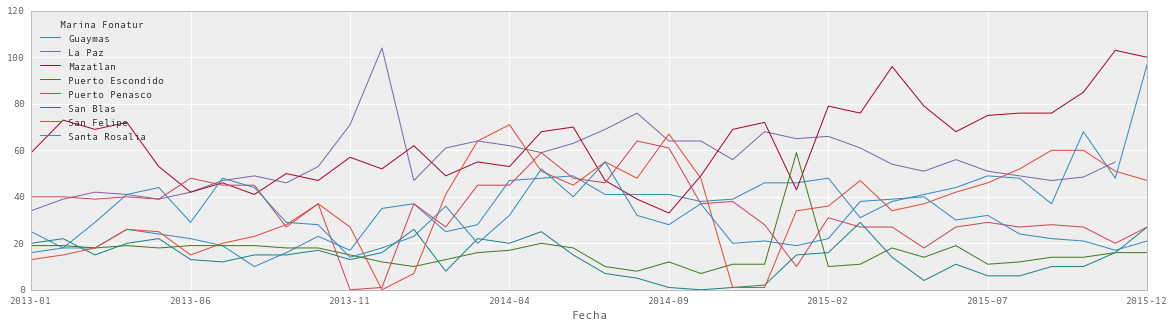

In [31]:
#Se grafica la tabla pivot
Puertos.pivot_table(values='Porcentaje de ocupacion muelles y boyas',columns='Marina Fonatur',index='Fecha').plot()

In [33]:
#Se contruye la tabla y luego solo se eligen los 3 puertos a revisar.
Tabla1=Puertos.pivot_table(values='Porcentaje de ocupacion muelles y boyas',columns='Marina Fonatur',index='Fecha')
Tabla1[['Mazatlan','La Paz','Guaymas']]


Marina Fonatur,Mazatlan,La Paz,Guaymas
Fecha,,,
2013-01,59.0,34.0,25.0
2013-02,73.0,39.0,18.0
2013-03,69.0,42.0,18.0
2013-04,72.0,41.0,26.0
2013-05,53.0,39.0,24.0
2013-06,42.0,42.0,22.0
2013-07,46.0,47.0,19.0
2013-08,41.0,49.0,10.0
2013-09,50.0,46.0,16.0


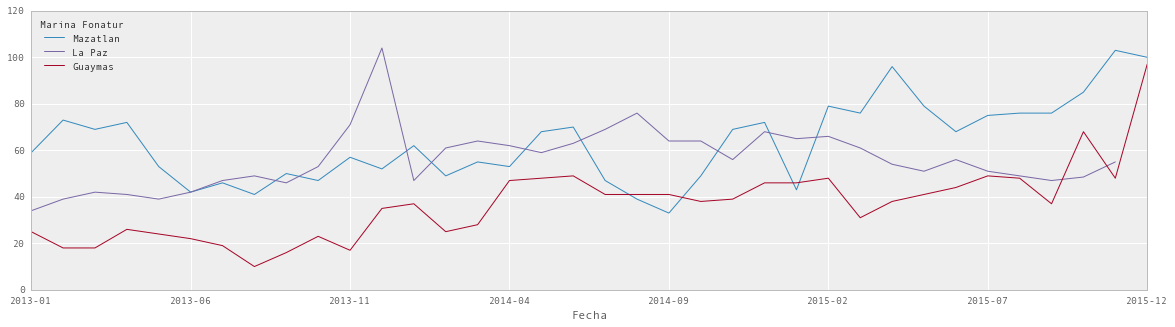

In [37]:
#En la línea morada se observa que al final, en el último punto falta un valor, esto es por el NaN
Tabla1=Tabla1[['Mazatlan','La Paz','Guaymas']]
Tabla1.plot()

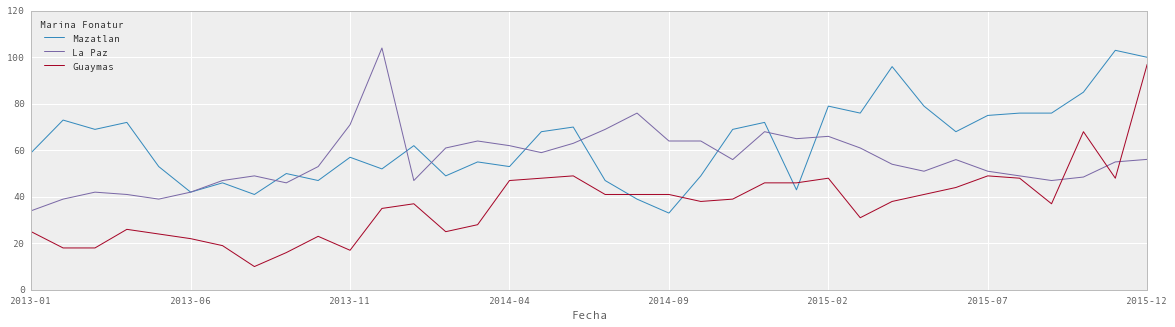

In [42]:
#Sustituimos el valor del Nan, si volvemos a graficar ya se muestra la línea morada con un dato en la última fecha.b
Tabla1=Tabla1.fillna(Tabla1.mean())
Tabla1.plot()

En la gráfica se observa que el porcentaje de ocuapción en muelles y boyas desde Febrero 2015 el puerto de **Mazatlán**( línea azul) es el más usado, siempre arriba del **60%** de ocupación. Por otro lado, muestra que la **Paz**(línea morada) desde la misma fecha muestra una "tendencia" a la baja. Luego viendo el comportamiento de **Guaymas**(línea roja), muestra de manera "global" un crecimiento casi contante, con ligeras bajas y altas, salvo por los ultimos meses del 2015 el crecimiento era "constante". 
**Nota**: en todas las palabras que resalto con **""**, requieren alguna explicación o aclaración, no la hago para evitar pasar a temas estadísticos, que son importantes pero no es la finalidad de lo que trato de hacer con **Pandas** por ahora. 

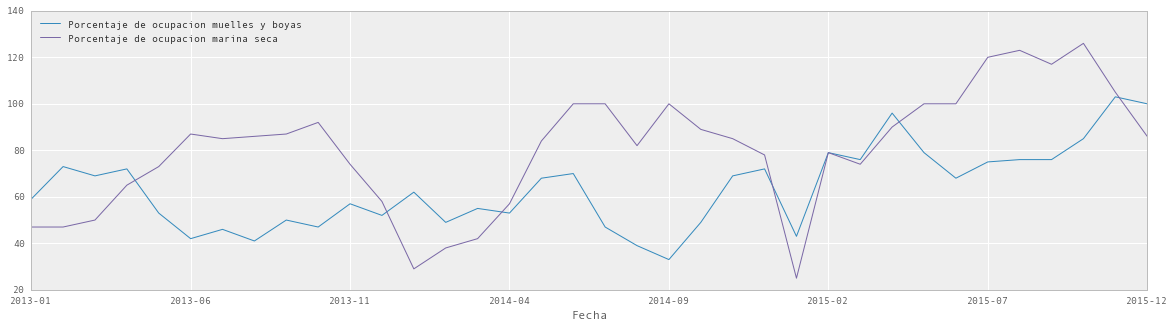

In [4]:
# Para explorar el comportamiento de Mazatlan, tanto de la ocupación en muelles y boyas, como de la marina seca eligo desde 
# el DataFrame los datos solo relacionados con ese puerto. Y construyo su gráfica.
Mazatlan=Puertos[Puertos['Marina Fonatur'].ix[:]=='Mazatlan']
Mazatlan.plot(x='Fecha')

La gráfica muestra que después de Febrero 2015 se registra una "alza", tanto en la ocupación de marina seca, como en muelles y boyas. Pero también se observa como entre Diciembre 2014 y Enero 2015 hay una baja muy considerable en el porcentaje de ocupación en general.

Solo por curiosidad, se puede pensar en hacer el "cruce" entre los porcentajes, para ver su posible relación. Esto solo lo hago gráficamete, pero se puede calcular también la correlación entre ellos.

In [5]:
#La correlación entre los dos porcentajes es de .312287, bastante bajo.
Mazatlan.corr()

,Porcentaje de ocupacion muelles y boyas,Porcentaje de ocupacion marina seca
Porcentaje de ocupacion muelles y boyas,1.000000,0.312287
Porcentaje de ocupacion marina seca,0.312287,1.000000


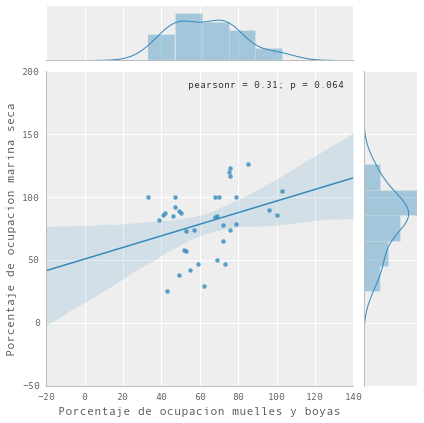

In [6]:
#Lo anterior gráficamente se puede visualizar con una gráfica que cuente con los histogramas y el scatterplot.
sns.jointplot(x="Porcentaje de ocupacion muelles y boyas",y="Porcentaje de ocupacion marina seca",data=Mazatlan,kind="reg")

Se muestra poca relación entre las dos tasas de porcentaje. No hago mayor exploración y se podría explorar si se comporta igua para cada uno de los puertos analizados. También se puede revisar la relación de los porcentajes de ocupación en muelles y boyas para los 3 puertos que se revisaron. Se hace esto desde los datos de la tabla 1.

In [51]:
#Matriz de correlaciones de Mazatla, la Paz y Guaymas.
Tabla1.corr()

Marina Fonatur,Mazatlan,La Paz,Guaymas
Marina Fonatur,,,
Mazatlan,1.000000,-0.198754,0.534982
La Paz,-0.198754,1.000000,0.231888
Guaymas,0.534982,0.231888,1.000000


De la tabla anterior se puede revisar la relación entre Guaymas y Mazatlan, la cual es considerable para revisar estadísticamente con más cuidado. Considerando las ubicaciones geográficas de los 3 puertos, es curioso que la Paz muestra correlación negativa y con Guaymas positiva, quizás relaciones comerciales o de cercanía que salen fuera de este breve análisis.

Otra cosa que se puede revisar es la relación entre las tasas de porcentaje para todos los puertos, posible no es tan parecida a los 3 que se revisaron.

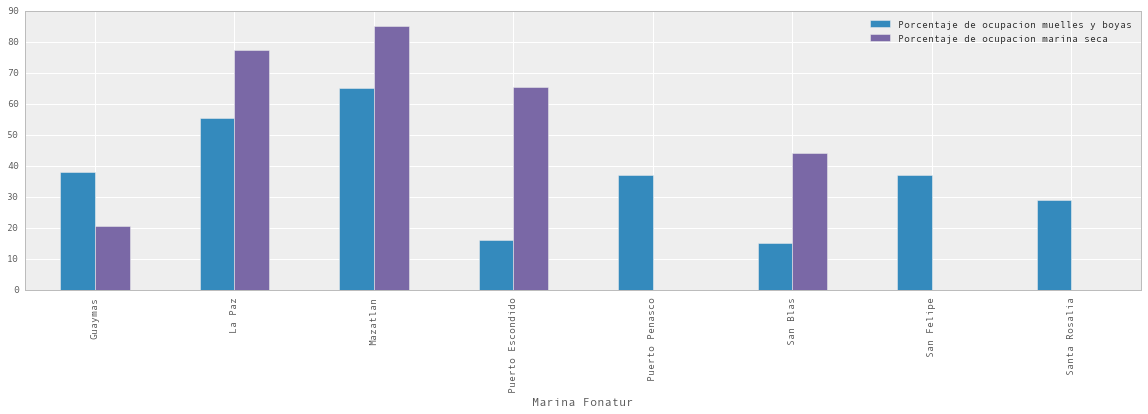

In [50]:
#Por último se puede visualizar la relación de las medianas de los porcentajes para cada uno de los puertos.
Puertos.groupby('Marina Fonatur').median().plot(kind='bar')


De manera clara se muestra que la mediana de los porcentajes de ocupación es diferente entre la Paz, Mazatlan con respecto a Guaymas. Posible debido al tipo de actividad turistica y económica, y quizás también algún factor que tienen que ver con la infraestructura de los lugares. Pero por último se ve que en los puertos  Puerto Escondido, San Felipe y Santa Rosalía no hay marina seca. 

**Comentarios**: La intención es mostrar como procesar los datos y tratar de explorar con respecto al tiempo, para nada se intenté hacer un "análisis fino" desde un punto de vista estadístico. Muchas de las operaciones que se hicieron con las tablas son básicas y muy usadas para explorar los datos desde **Pandas**.